# GeoPandas

Documentation here <https://geopandas.org/getting_started/introduction.html>

## Import

In [1]:
JSON_URL = 'https://datos.canarias.es/catalogos/estadisticas/dataset/24d0ed91-1ce1-47e3-8b4c-44cf843fec28/resource/b3f12117-e4fd-4b8c-a31f-a93a1a8a020d/download/islas_20170101.json'
BASE_DIR = '/Users/efraflores/Desktop/hub/datathon2021/datathon2021/data/test'
CP_COOR_FILE = 'ES_cp_coor.txt'

In [2]:
import geopandas as gpd

df = gpd.read_file(JSON_URL).to_crs("EPSG:3395").set_index('geocode')
df.sample()

,etiqueta,notas,granularidad,gcd_provincia,superficie,perimetro,utm_x,utm_y,longitud,latitud,utm_x_capi,utm_y_capi,long_capi,lati_capi,geometry
geocode,,,,,,,,,,,,,,,
ES707,La Palma,Cabildo de La Palma,ISLAS,ES702,70610.2,181891.0,220710.17,3173129.57,-17.857377,28.655223,229746.0,3175822.0,-17.765661,28.681415,"MULTIPOLYGON (((-1981093.142 3294108.780, -198..."


# Basic functions

## Area

In [3]:
df['area'] = df.area
df['area']

geocode
ES703    3.412987e+08
ES704    2.143631e+09
ES705    1.997474e+09
ES706    4.718589e+08
ES707    9.161553e+08
ES708    1.103523e+09
ES709    2.619909e+09
Name: area, dtype: float64

## Boundary

In [4]:
df['boundary'] = df.boundary
df['boundary']

geocode
ES703    MULTILINESTRING ((-1999385.825 3190402.032, -1...
ES704    MULTILINESTRING ((-1538258.812 3321672.683, -1...
ES705    MULTILINESTRING ((-1712166.327 3220213.771, -1...
ES706    MULTILINESTRING ((-1907842.703 3249046.836, -1...
ES707    MULTILINESTRING ((-1981093.142 3294108.780, -1...
ES708    MULTILINESTRING ((-1514485.391 3347605.240, -1...
ES709    MULTILINESTRING ((-1818670.124 3278763.689, -1...
Name: boundary, dtype: geometry

## Centroid

In [5]:
df['centroid'] = df.centroid
df['centroid']

geocode
ES703    POINT (-2004448.733 3197143.458)
ES704    POINT (-1562475.747 3280023.496)
ES705    POINT (-1735853.690 3223250.639)
ES706    POINT (-1918317.986 3243646.467)
ES707    POINT (-1987920.518 3315717.002)
ES708    POINT (-1517962.463 3359556.863)
ES709    POINT (-1843058.096 3265446.388)
Name: centroid, dtype: geometry

## Distance

In [6]:
first_point = df['centroid'].iloc[0]
df['distance'] = df['centroid'].distance(first_point)
df['distance']

geocode
ES703         0.000000
ES704    449676.796392
ES705    269860.857747
ES706     97882.763877
ES707    119719.952640
ES708    512881.082910
ES709    175249.045740
Name: distance, dtype: float64

# Plot

## Full area

<AxesSubplot:>

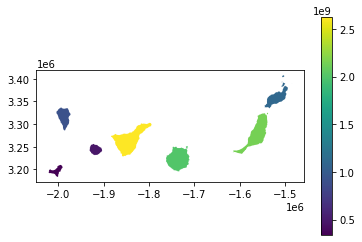

In [7]:
df.plot("area", legend=True)

## Centroids

<AxesSubplot:>

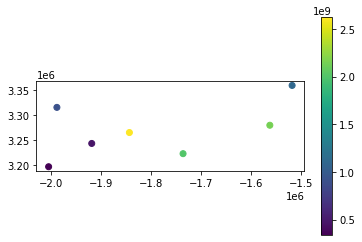

In [8]:
df = df.set_geometry("centroid")
df.plot("area", legend=True)

## Both

<AxesSubplot:>

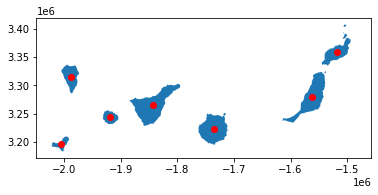

In [9]:
ax = df["geometry"].plot()
df["centroid"].plot(ax=ax, color="red")

# Geometry

In [10]:
# Set the active geometry back to the original 
df = df.set_geometry("geometry")

## Convex hull

In [11]:
# The convex hull is the smallest convex set that contains it
df["convex_hull"] = df.convex_hull
df["convex_hull"] 

geocode
ES703    POLYGON ((-2002286.569 3183560.345, -2002359.4...
ES704    POLYGON ((-1595636.878 3234445.783, -1595997.1...
ES705    POLYGON ((-1736465.302 3195672.022, -1744813.2...
ES706    POLYGON ((-1919542.956 3231395.217, -1922328.1...
ES707    POLYGON ((-1986190.731 3285807.997, -1987560.2...
ES708    POLYGON ((-1534790.385 3334495.208, -1544232.8...
ES709    POLYGON ((-1856619.068 3228675.543, -1856717.2...
Name: convex_hull, dtype: geometry

<AxesSubplot:>

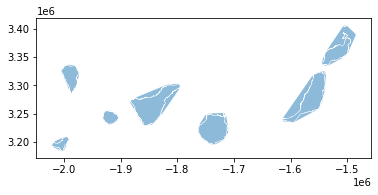

In [12]:
ax = df["convex_hull"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
df["boundary"].plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

## Buffered

In [13]:
# buffering the active geometry by 10 000 feet (geometry is already in feet)
df["buffered"] = df.buffer(11000)

# buffering the centroid geometry by 10 000 feet (geometry is already in feet)
df["buffered_centroid"] = df["centroid"].buffer(11000)

df[['buffered', 'buffered_centroid']]

,buffered,buffered_centroid
geocode,,
ES703,"POLYGON ((-2032590.120 3194521.552, -2032597.1...","POLYGON ((-1993448.733 3197143.458, -1993501.7..."
ES704,"POLYGON ((-1598853.795 3223878.330, -1598900.9...","POLYGON ((-1551475.747 3280023.496, -1551528.7..."
ES705,"POLYGON ((-1773656.703 3219185.830, -1773658.2...","POLYGON ((-1724853.690 3223250.639, -1724906.6..."
ES706,"POLYGON ((-1942102.423 3243302.657, -1942118.7...","POLYGON ((-1907317.986 3243646.467, -1907370.9..."
ES707,"POLYGON ((-2015456.186 3325672.426, -2015481.4...","POLYGON ((-1976920.518 3315717.002, -1976973.4..."
ES708,"POLYGON ((-1553033.815 3348377.958, -1552645.7...","POLYGON ((-1506962.463 3359556.863, -1507015.4..."
ES709,"POLYGON ((-1894960.326 3273151.850, -1894960.0...","POLYGON ((-1832058.096 3265446.388, -1832111.0..."


<AxesSubplot:>

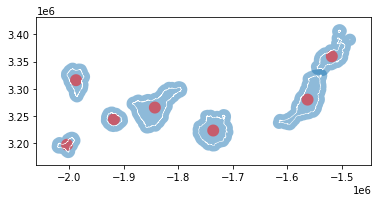

In [14]:
ax = df["buffered"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
df["buffered_centroid"].plot(ax=ax, color="red", alpha=.5)  # passing the first plot as an axis to the second
df["boundary"].plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

## Geometry

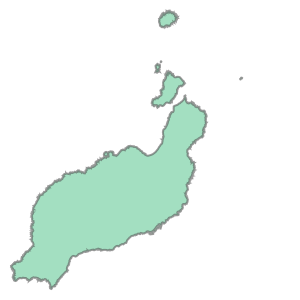

In [15]:
geom = df.loc['ES708','geometry']
geom

## Intersect

In [16]:
# Is the buffered area intersecting with the filtered geometry?
df["buffered"].intersects(geom)

geocode
ES703    False
ES704     True
ES705    False
ES706    False
ES707    False
ES708     True
ES709    False
dtype: bool

## Within

In [17]:
# Check if the centroids are within the geometry (not buffered)
df["within"] = df["buffered_centroid"].within(df['geometry'])
df["within"]

geocode
ES703    False
ES704     True
ES705     True
ES706    False
ES707    False
ES708    False
ES709     True
Name: within, dtype: bool

<AxesSubplot:>

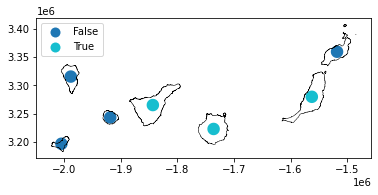

In [18]:
df = df.set_geometry("buffered_centroid")
ax = df.plot("within", legend=True, categorical=True, legend_kwds={'loc': "upper left"})  # using categorical plot and setting the position of the legend
df["boundary"].plot(ax=ax, color="black", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

# Group/ungroup

## Dissolve (groupby)

In [36]:
df.dissolve('gcd_provincia', aggfunc='mean')[['area','within']]

,area,within
gcd_provincia,,
ES701,1.748209e+09,0.666667
ES702,1.087306e+09,0.250000


## Coordinates to polygon

<AxesSubplot:>

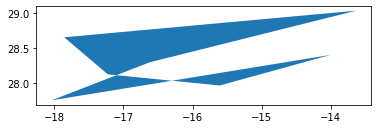

In [49]:
from shapely.geometry import Polygon

polygon_geom = Polygon(zip(df['longitud'],df['latitud']))
gpd.GeoDataFrame(index=[0], crs="EPSG:3395", geometry=[polygon_geom]).plot()

## Coordinates to multipoint

In [61]:
from shapely.geometry import Point, MultiPoint

points = gpd.GeoSeries([Point(x,y) for x,y in zip(df['longitud'],df['latitud'])])
print(points)
multip = MultiPoint(points)
print(multip)

0    POINT (-18.03816 27.74361)
1    POINT (-14.00488 28.40036)
2    POINT (-15.60624 27.95816)
3    POINT (-17.22558 28.11923)
4    POINT (-17.85738 28.65522)
5    POINT (-13.63622 29.03947)
6    POINT (-16.62148 28.29338)
dtype: geometry
MULTIPOINT (-18.038165 27.743606, -14.004885 28.400363, -15.606239 27.958157, -17.225583 28.11923, -17.857377 28.655223, -13.636218 29.039468, -16.621481 28.293378)


## Explode (melt)

In [76]:
# Create a multipoint column
df['multip'] = df.index.map(lambda x: multip)
print(df.shape)
df.explode(column='multip').shape

(7, 24)


(49, 24)

# Pandas to Geopandas

## Import DataFrame

In [2]:
from pathlib import Path
import pandas as pd

BASE_DIR = Path(BASE_DIR)

df = pd.read_csv(BASE_DIR.joinpath(CP_COOR_FILE),sep='\t',header=None)
df.columns = ['country','postal_code','place','state','state_code','province','province_code','comunity','comunity_code','lat','lng','accuracy']
df = df[df['state']=='Canarias'].copy()
df.sample()

,country,postal_code,place,state,state_code,province,province_code,comunity,comunity_code,lat,lng,accuracy
20450,ES,35629,Casa De Violante,Canarias,CN,Las Palmas,GC,Tuineje,35030.0,28.266,-14.0596,3


In [3]:
df.to_csv(BASE_DIR.joinpath('Canarias_CP.csv'), index=False)

## Convert to GeoDataFrame

In [143]:
gdf = gpd.GeoDataFrame(df, crs="EPSG:3395", geometry=gpd.points_from_xy(df['lat'], df['lng']))
gdf.sample()

,country,postal_code,place,state,state_code,province,province_code,comunity,comunity_code,lat,lng,accuracy,geometry
20834,ES,38591,Aguerche,Canarias,CN,Santa Cruz de Tenerife,TF,Güímar,38020.0,28.2606,-16.4297,3,POINT (28.26060 -16.42970)


## Group by community

In [144]:
df = gdf.dissolve(by='comunity')
df.sample(3)

,geometry,country,postal_code,place,state,state_code,province,province_code,comunity_code,lat,lng,accuracy
comunity,,,,,,,,,,,,
Fasnia,POINT (28.23640 -16.43890),ES,38570,Fasnia,Canarias,CN,Santa Cruz de Tenerife,TF,38012.0,28.2364,-16.4389,4
Güímar,"MULTIPOINT (28.26060 -16.42970, 28.27050 -16.4...",ES,38500,Guimar,Canarias,CN,Santa Cruz de Tenerife,TF,38020.0,28.3039,-16.4325,4
Buenavista del Norte,"MULTIPOINT (28.30400 -16.84240, 28.31820 -16.8...",ES,38479,Sibora,Canarias,CN,Santa Cruz de Tenerife,TF,38010.0,28.3661,-16.8155,1


In [ ]:
from shapely.geometry import Polygon

def make_polygon(x):
    try: pol = Polygon(x)
    # If there are less than three POINTS a Polygon cannot be built
    except:
        try: point_coord = x[0].coords[0]
        except: point_coord = x.coords[0]
        new_coord = None

In [164]:
df.loc['Agulo','geometry'][0].coords[0]

(28.145, -17.2274)

# Merge

# Overlay

# Background map